# Analiza najboljših knjig

Med študijem na FMF vas prešini grenko spoznanje: medtem ko vi trpite za skripto analize ali se mučite s pisanjem naloge za programiranje študenti kake druge veje Univerze v Ljubljani(khm FDV) posedajo po kavarnah in preprosto ne vedo, kaj bi s svojim časom. Tako se odločite, da boste postali samooklicani umetnik, napisali eno ali dve uspešni knjigi in nato lagodno živeli od obilnih prihodkov. 

Ker ne želite izgubljati časa s pisanjem povprečnih del, ampak se že s svojim prvencem zavihteti na vrh, se odločite poizvedeti, kakšno delo morate ustvariti, da bo vaša možnost za uspeh večja. Tako najdete spletno stran goodreads.com in se odločite slepo slediti njeni lestvici pri ustvarjanju vrhunske literature.

In [1]:
import pandas as pd

Za začetek shranimo podatke o knjigah, žanrih in nagradah v nove spremenljivke. Za indeksni stolpec pri vseh treh izberem "id_knjige". Ta je določen enolično, saj ga vsaka knjiga dobi glede na mestno na lestvici, mesta pa se ne ponavljajo.

Pri združevanju csv datotek se je vrstni red lestvice rahlo premešal, tako da moramo podatke po uvozu spet posortirati. Sortiramo po vrstnem redu dela na lestvici.

Opomba: Če želimo sortirati po "score", je vseeno če sortiramo po id_knjige, saj "score" določi mesto knjige na lestvici (knjiga z najvišjim se nahaja na prvem mestu).

In [2]:
knjige = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_knjige.csv', index_col='id_knjige').sort_values('id_knjige')

In [3]:
knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
4,Pride and Prejudice,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Dragons of Winter Night,Margaret Weis,869,True,They won their first real battle in the war fo...,2007,Devil's Due Publishing,4.09,608,7,48760,811,False
4997,Tempt Me at Twilight,Lisa Kleypas,27847,True,He was everything she'd sworn to avoid. Poppy...,2009,St. Martin's Paperbacks,4.18,608,7,34971,1897,False
4998,هيبتا,محمد صادق,2994581,False,تأخذنا رواية (هيبتا) إلي ذلك العالم الذي أهلكه...,2014,الرواق للنشر والتوزيع,3.74,608,7,51945,6241,False


In [4]:
zanri = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzeni_zanri.csv',index_col='id_knjige').sort_values('id_knjige')

In [5]:
zanri

,zanr
id_knjige,
1,young-adult
1,fiction
1,dystopia
2,fantasy
2,young-adult
...,...
4999,italian-literature
4999,novels
5000,epic


In [6]:
nagrade = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_nagrade.csv',index_col='id_knjige').sort_values('id_knjige')

In [7]:
nagrade

,nagrada
id_knjige,
1,Locus Award Nominee for Best Young Adult Book
1,New Mexico Land of Enchantment Award for Young...
1,Eliot Rosewater Indiana High School Book Award
1,The Inky Awards for Silver Inky
1,California Young Readers Medal for Young Adult
...,...
4991,Locus Award Nominee for Best Science Fiction N...
4991,British Science Fiction Association Award Nomi...
4991,Hugo Award Nominee for Best Novel


# Kateri žanri so najbolj priljubljeni?

Za začetek želim ugotoviti, katerega žanra naj bo moje delo, zato se odločim poiskati najbolj priljubljene žanre na lestvici.<br>
Ker se lahko zgodi, da je začetnih nekaj sto knjig(najbolje ocenjene) večinoma enega žanra, večinski preostanek pa drugega, bom analizirala najbolj priljubljen žanr za prvih 100, 1000 in 5000 knjig. S tem želim preveriti tudi ali nek žanr prevladuje na celotni lestvici ali pa je prisoten zgolj na vrhu in se kasneje porazdeli z drugimi žanri.<br>
Ker pri vsaki knjigi zajamem tri žanre, moram za prvih 100 knjig torej vzeti prvih 300 žanrov. Podobno za 1000 in 5000 knjig.

In [8]:
priljubljeni_zanri_100 = zanri.head(300).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [9]:
priljubljeni_zanri_100.head(10)

,st_zanrov
zanr,
fiction,91
classics,63
fantasy,25
young-adult,21
historical-fiction,18
romance,10
science-fiction,9
childrens,7
horror,6


Med prvimi stotimi knjigami sta torej najbolj priljubljena fikcija(fiction) in klasika(classics), sledijo fantastika(fantasy), literatura za mlade(young-adult, 12-18 let) in zgodovinska fikcija(historical-fiction).

Poglejmo ali se priljubljenost zanrov spremni, ko pogledamo širše po lestvici.

In [10]:
priljubljeni_zanri_1000 = zanri.head(3000).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [11]:
priljubljeni_zanri_1000.head(10)

,st_zanrov
zanr,
fiction,694
classics,356
fantasy,275
young-adult,247
historical-fiction,148
romance,145
contemporary,97
science-fiction,76
non-fiction,67


In [12]:
priljubljeni_zanri = zanri.groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [230]:
priljubljeni_zanri.head(10)

,st_zanrov
zanr,
fiction,2857
fantasy,1384
young-adult,1249
classics,866
romance,768
historical-fiction,565
contemporary,564
non-fiction,458
mystery,397


Fikcija torej kraljuje skozi celotno lestvico, zato se zdi precej varna izbira za naš žanr. Ker sta ji blizu tudi fantastika in literatura za mlade, bi bilo v žanr smiselno vključiti tudi zmes teh dveh. Klasiko bi bilo verjetno težko združiti s prvimi tremi žanri, zato pa bi lahko dodali še nekaj romantike in s te pokrili dobršen del celotne lestvice.

Ker bi bilo za svoje delo lepo prejeti nagrado, želim preveriti, kako nagrajeni so posamezni žanri.
Za začetek preverim kateri žanr na lestvici je prejel največ nagrad.

In [14]:
zanri_z_nagrado = pd.merge(zanri,nagrade,left_on='id_knjige',right_on='id_knjige').groupby('zanr').size().to_frame('st_nagrad').sort_values('st_nagrad',ascending=False)

In [15]:
zanri_z_nagrado.head(10)


,st_nagrad
zanr,
fiction,4868
young-adult,2709
fantasy,2233
historical-fiction,1278
contemporary,1025
romance,964
science-fiction,900
mystery,631
classics,622


Med desetimi najbolj priljubljenimi žanri in desetimi najbolj nagrajenimi žanri so torej le manjše razlike: nekateri žanri so pridobili/izgubili nekaj mest na lestvici, znanstvena fantastika pa je zamenjala paranormalno.<br>
Po lestvici je glede na število nagrad najbolj nazadovala klasika, kar pa gre lahko pripisati tudi dejstvu, da imamo danes veliko več literarnih nagrad kot v letih izida klasikov.

Ker je na lestvici veliko več fikcije kot npr. skandinavske literature, je smiselno, da bo tudi skupno število nagrad fikcije višje, kot skupno število nagrad skandinavske literature.<br>
Zato naredim tudi analizo povprečnega števila nagrad na knjigo v posameznem žanru.

In [16]:
zanri_nagrade = pd.merge(zanri_z_nagrado,priljubljeni_zanri,left_on='zanr',right_on='zanr')

In [17]:
zanri_nagrade['nagrada_na_knjigo'] = zanri_nagrade.st_nagrad / zanri_nagrade.st_zanrov

In [233]:
zanri_nagrade.sort_values('nagrada_na_knjigo')[::-1].head(20)

,st_nagrad,st_zanrov,nagrada_na_knjigo
zanr,,,
scandinavian-literature,16,2,8.000000
new-york,6,1,6.000000
realistic-fiction,121,23,5.260870
dutch-literature,5,1,5.000000
south-africa,5,1,5.000000
cyberpunk,37,8,4.625000
alternate-history,13,3,4.333333
steampunk,46,11,4.181818
hugo-awards,4,1,4.000000


Na vrhu po številu nagrad na knjigo so povsem drugi žanri, vendar pa vidimo, da so te žanri zelo redki. Imamo namreč 5000 knjig, vsaka izmed njih pa tri žanre, skupno 15000 žanrov, noben od vodilnih dvajsetih žanrov te lestvice pa nima več kot 60 predstavnikov.<br>
Iz tega lahko razberemo le, da so nekateri od manjšinskih žanrov na lestvici zelo dobro nagrajeni.<br>
Ker pa nas zanima predvsem nagrajenost pogostih žanrov, si oglejmo nagrajenost žanrov z vsaj 500 deli.

In [243]:
zanri_nagrade[zanri_nagrade.st_zanrov >=500].sort_values('nagrada_na_knjigo')[::-1]

,st_nagrad,st_zanrov,nagrada_na_knjigo
zanr,,,
historical-fiction,1278,565,2.261947
young-adult,2709,1249,2.168935
contemporary,1025,564,1.817376
fiction,4868,2857,1.703885
fantasy,2233,1384,1.613439
romance,964,768,1.255208
classics,622,866,0.718245


Vsak od petih najpogostejših žanrov ima povprečno vsaj eno (oz. v primeru klasike "eno slabo") nagrado na knjigo.

Poglejmo še ali so bolj priljubljeni žanri tudi bolje ocenjeni.

In [19]:
zanri_in_ocena = pd.merge(zanri,knjige['povprecna_ocena'],left_on='id_knjige',right_on='id_knjige')

In [259]:
povprecna_ocena_zanra_vse = zanri_in_ocena.groupby('zanr').mean().sort_values('povprecna_ocena', ascending=False)

In [260]:
povprecna_ocena_zanra = pd.merge(povprecna_ocena_zanra_vse,zanri_nagrade,left_on='zanr',right_on='zanr')[['povprecna_ocena','st_zanrov']]

In [265]:
povprecna_ocena_zanra_nad500 = povprecna_ocena_zanra[povprecna_ocena_zanra.st_zanrov >=500].povprecna_ocena.mean()

In [267]:
povprecna_ocena_zanra_nad500

4.048701762487156

In [268]:
povprecna_ocena_zanra_pod500 = povprecna_ocena_zanra[povprecna_ocena_zanra.st_zanrov <500].povprecna_ocena.mean()

In [269]:
povprecna_ocena_zanra_pod500

4.07437688870092

Bralci so torej večinske in redkejše žanre na lestvici ocenili približno enako.

Povzetek: največjo možnost, da se uvrstimo na lestvico bomo imeli z izbiro žanra fikcija, ki mu dodamo malo fantastike in romance ter za ciljno publiko izberemo mlade odrasle(12-18 let). Knjige tega žanra so v povprečju prejele po eno nagrado na delo, bralci pa jih ocenjujejo približno tako kot vse druge žanre.

# Ali med priljubljenemi knjigami prevladujejo serije?

Zanima nas tudi ali so bolj splača napisati serijo ali individualno delo. 


Za začetek poglejmo, kaj prevladuje med prvimi stotimi knjigami

In [21]:
knjige.head(100).groupby('serija').size()

serija
False    61
True     39
dtype: int64

Med knjigami na vrhu lestvice torej pravladujejo "solo" knjige. <br>
Poglejmo si, če se delež serij poveča, če povečamo število knjig.

In [22]:
knjige.groupby('serija').size()

serija
False    2351
True     2649
dtype: int64

Vidimo, da sta tipaše vedno precej blizu, toda sedaj je delež serij večji.<br>
Narišimo še graf, da vidmo spreminjanje količine serij in posameznih del po lestvici.

Narišimo grafa, ki ponazarjata število serij in posameznih del glede na število vseh knjig.<br>
Primer: <br>
Prva tri dela z lestvice so serije, četrto pa je posamezno delo. graf serij bo torej do vključno števila tri potekal po simetrali lihih kvadrantov, pri številu 4(štiri knjige), pa bo vrednost y koordinate enaka 3(tri dela od štirih so serije).
Graf pozameznih del bo do vključno števila tri imel y koordinato enako nič, pri številu štiri pa ena.<br>
Če je torej na nekem delu graf serij nad grafom posameznih del to pomeni, da na tistem delu prevladujejo serije.<br>
Vsota grafov nam seveda vedno da simetralo lihih kvadrantov.

Definirati moramo funkciji, ki bosta šteli število serij in posameznih del glede na število vseh del.<br>
Spletna stran s podatki je pri nekaterih delih "sesuta", zato posameznih del s strani ni med našimi podatki. Id-ji knjig so podani glede na mesto na lestvici, tako da nam lahko nekaj id-jev manjka (nimamo vseh števil od 1 do 5000). Pri vpeljavi funkcij za štetje bi bilo to precej nerodno, zato vpeljemo "knjige2", pri katerih za indeksni stolpec vzamemo avtomatko generiran stolpec stevil od 0 do dolžine tabele. Pri definiranju funkcij in risanju grafa bomo namesto z id_knjige torej delali s tem stolpcem.

In [23]:
knjige2 = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_knjige.csv')

In [24]:
knjige2.head(5)

,knjiga,id_knjige,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
0,The Hunger Games,1,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
1,Harry Potter and the Order of the Phoenix,2,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
2,To Kill a Mockingbird,3,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
3,Pride and Prejudice,4,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
4,Twilight,5,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True


Definiramo funkciji, ki štejeta serije in posamezna dela.<br>
Funkciji za vsako delo v seznam zapišeta, koliko del po lestvici nad delom(vključno s trenutnim delom) je serija/posamezno delo.

In [25]:
def stej_serije(x):
    sez = []
    for i in range(0,x):
        if i == 0:
            if knjige2.serija[i]==True:
                sez+=[1]
            else:
                sez.append(0)
        else:
            if knjige2.serija[i]==True:
                sez+=[sez[i-1]+1]
            else:
                sez+=[sez[i-1]]
    return sez
    

In [26]:
def stej_solo(x):
    sez = []
    for i in range(0,x):
        if i == 0:
            if knjige2.serija[i]==False:
                sez+=[1]
            else:
                sez.append(0)
        else:
            if knjige2.serija[i]==False:
                sez+=[sez[i-1]+1]
            else:
                sez+=[sez[i-1]]
    return sez

Najprej narišimo grafa za prvih sto del.

In [27]:
a = stej_serije(100)

In [28]:
b = stej_solo(100)

In [29]:
s= [i for i in range(1, len(a)+1)]

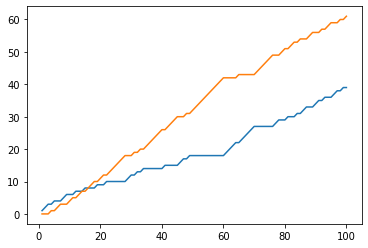

In [30]:
from matplotlib import pyplot as plt
plt.plot(s,a)
plt.plot(s,b)

Oranžen graf predstavlja posamezna dela, moder pa serije. Vidimo, da med približno prvimi petnajstimi deli prevladujejo serije, nato pa je delež posameznih del večji (v prejšnjih izračunih smo videli, da je razmerje posameznih del proti serijam v prvi stoterici približno 6:4).<br>
Sedaj si poglejmo, kako se količini spreminjata skozi celotno lestvico.

In [31]:
a_cel = stej_serije(len(knjige2))

In [32]:
b_cel = stej_solo(len(knjige2))

In [33]:
s_cel= [i for i in range(1, len(knjige2)+1)]

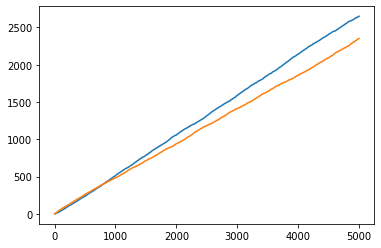

In [34]:
plt.plot(s_cel,a_cel)
plt.plot(s_cel,b_cel)

Vidimo, da je delež serij in posameznih del približno enak. Na začetku rahlo prevladujejo posamezna dela, kasneje pa serije. Zdi se torej, da dejstvo, da je delo del serije ali ne, ne vpliva bistveno splošno priljubljenost dela(med najbolj priljubljenimi deli je približno polovica serij in polovica posameznih del).

Poglejmo še, pri katerem tipu je povprečna ocana bralcev višja(ocena od 1 do 5).<br>
Opomba: Prej smo analizirali glede na score, v katerem so združeni st_reviewov, povprecna_ocena, st_glasov, st_ocen...

In [35]:
povprecna_ocena_serije = knjige[knjige.serija == True].povprecna_ocena.mean()

In [36]:
povprecna_ocena_solo = knjige[knjige.serija == False].povprecna_ocena.mean()

In [37]:
povprecna_ocena_serije

4.0981879954699885

In [38]:
povprecna_ocena_solo

4.023002977456401

Povprečna ocena serij je torej za malenkost višja, toda razlika je zanemarljiva(0,05 točke). Ocena bralcev je torej praktično ista za serije in posamezna dela.

Glede na našo analizo lahko torej zaključimo, da se malenkost bolj splača napisati serijo. Poleg tega imamo po uspešnem prvem delu zagotovljeno bralno publiko za naslednje dele.

# Kateri avtorji in založbe so imeli največ uspešnic?

Da dobimo občutek, kakšen stil pisanja želijo bralci, poiščemo najboljše avtorje in kasneje preberemo nekaj njihovih del.
Znova bomo najuspešnejšega avtorja poiskali v različno velikih skupinah: 100, 1000 in 10000 knjig.

Za začetek si poglejmo, kateri avtorji imajo največ del na čistem vrhu lestvice in med prvimi 5000 deli na lestvici:

Iščemo avtorja z največ deli med prvo stoterico:

In [39]:
st_knjig_avtorja_100 = knjige[['avtor','id_avtor']].head(100).groupby('id_avtor').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [40]:
najboljsi_avtorji_100 = pd.merge(st_knjig_avtorja_100,knjige[['avtor','id_avtor']],left_on='id_avtor',right_on='id_avtor')

In [41]:
najboljsi_avtorji_100.drop_duplicates(keep='last').sort_values('st_knjig',ascending=False).head(10)

,id_avtor,st_knjig,avtor
13,1077326,4,J.K. Rowling
21,569,2,Khaled Hosseini
31,656983,2,J.R.R. Tolkien
43,239579,2,Charles Dickens
51,3137322,2,Fyodor Dostoyevsky
18,3706,2,George Orwell
387,630,1,Dan Brown
432,106,1,Madeleine L&#39;Engle
428,306,1,William Golding
427,316,1,Alice Sebold


J.K.Rowlin je torej napisala kar 4 izmed stotih najbolje ocenjenih knjig spletne strani.<br>

Poiščimo še najbolj uspešnega avtorja cele lestvice(oz. v našem primeru prvih 5000 del).

In [42]:
st_knjig_avtorja = knjige[['avtor','id_avtor']].groupby('id_avtor').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [270]:
najboljsi_avtorji = pd.merge(st_knjig_avtorja,knjige[['avtor','id_avtor']],left_on='id_avtor',right_on='id_avtor').drop_duplicates(keep='last').sort_values('st_knjig',ascending=False)

In [338]:
najboljsi_avtorji.head(20)

,id_avtor,st_knjig,avtor
51,3389,52,Stephen King
90,1654,39,Terry Pratchett
117,15872,27,Rick Riordan
139,137902,22,Richelle Mead
159,9550,20,Laurell K. Hamilton
179,1221698,20,Neil Gaiman
198,2345,19,Nicholas Sparks
217,947,19,William Shakespeare
236,10746,19,Jim Butcher
254,3780,18,James Patterson


Oglejmo si, katerega žanra so dela desetih najuspešnejših avtorjev(gledano na celotno lestvico).

In [281]:
tabela_avtorjev = [i for i in najboljsi_avtorji.id_avtor.head(20)]

In [282]:
dela_najboljsih_avtorjev = knjige[(knjige.id_avtor).isin(tabela_avtorjev)]

In [283]:
zanr_del_najboljsih_avtorjev = pd.merge(dela_najboljsih_avtorjev, zanri,left_on='id_knjige',right_on='id_knjige').groupby('zanr')

In [284]:
zanr_del_najboljsih_avtorjev.size().to_frame('st_knjig_zanra').sort_values('st_knjig_zanra', ascending=False).head(10)

,st_knjig_zanra
zanr,
fantasy,253
fiction,234
young-adult,106
paranormal,79
horror,67
romance,65
vampires,48
urban-fantasy,47
humor,33


Če je naš cilj postati pisatelj z največ knjigami na lestvici goodreads je izbira žanra fatasy/fiction naravnost vrhunska.

TO DO:poiskati avtorja in zalozbo z najvec nagradami

Sedaj želimo izbrati založbo, ki nas bo najverjetneje ustrelila med pisateljske zvezde.

In [296]:
st_knjig_zalozbe = knjige[knjige.zalozba != "unknown"][['zalozba']].groupby('zalozba').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [298]:
st_knjig_zalozbe.head(10)

,st_knjig
zalozba,
Vintage,135
Penguin Books,92
Ballantine Books,72
HarperTeen,65
Penguin Classics,65
HarperCollins,63
St. Martin's Press,51
"Little, Brown and Company",47
"Little, Brown Books for Young Readers",47


Poiščimo najbolj nagrajenega avtorja in založbo.

In [52]:
nagrajene_knjige = knjige[knjige.nagrade == True]

Za začetek poglejmo, katera založba ima največ del, ki so prejela vsaj eno nagrado.

In [300]:
st_nagrajenih_knjig_zalozbe = nagrajene_knjige.groupby('zalozba').size().to_frame('st_nagrajenih_knjig').sort_values('st_nagrajenih_knjig', ascending=False).head(15)

In [339]:
st_nagrajenih_knjig_zalozbe

,st_nagrajenih_knjig
zalozba,
Vintage,83
Penguin Books,44
Ballantine Books,38
Random House,35
"Little, Brown Books for Young Readers",34
Tor Books,32
HarperCollins,32
"Little, Brown and Company",31
St. Martin's Press,30


Poiščimo najbolj uspešno založbo po številu nagrad.

In [54]:
pd.merge(nagrajene_knjige, nagrade,left_on='id_knjige',right_on='id_knjige').groupby('zalozba').size().to_frame('st_nagrad').sort_values('st_nagrad', ascending=False).head(10)

,st_nagrad
zalozba,
Vintage,217
"Little, Brown and Company",155
Random House,145
"Little, Brown Books for Young Readers",130
Alfred A. Knopf,125
Scholastic Press,125
HarperCollins,115
Penguin Books,111
Tor Books,101


Založba Vintage je torej založila največ knjig z lestvice, ima največ del, ki so prejela vsaj eno nagrado in je skupno prejela največ nagrad.

Poiščimo avtorja z največ nagrajenimi knjigami.

In [55]:
nagrajeni_avtorji = nagrajene_knjige.groupby('id_avtor').size().to_frame('st_nagrad').sort_values('st_nagrad', ascending=False).head(10)

In [56]:
najbolj_nagrajeni_avtorji = pd.merge(nagrajeni_avtorji, knjige[['id_avtor','avtor']],left_on='id_avtor',right_on='id_avtor').drop_duplicates(keep='last')

In [57]:
najbolj_nagrajeni_avtorji

,id_avtor,st_nagrad,avtor
51,3389,39,Stephen King
90,1654,22,Terry Pratchett
117,15872,15,Rick Riordan
137,1221698,13,Neil Gaiman
151,1077326,12,J.K. Rowling
164,3433047,12,Sarah J. Maas
181,150038,12,Cassandra Clare
197,20248,12,J.R. Ward
219,137902,11,Richelle Mead
235,3354,10,Haruki Murakami


Ugotovimo še, v katerem žanru ustvarjajo te pisatelji.

In [58]:
sez_naj_nagrajenih_avtorjev = [i for i in najbolj_nagrajeni_avtorji.id_avtor]

In [59]:
dela_naj_nagrajenih_avtorjev = knjige[(knjige.id_avtor).isin(sez_naj_nagrajenih_avtorjev)]

In [60]:
zanr_del_naj_nagrajenih_avtorjev = pd.merge(dela_naj_nagrajenih_avtorjev, zanri,left_on='id_knjige',right_on='id_knjige').groupby('zanr')

In [61]:
zanr_del_naj_nagrajenih_avtorjev.size().to_frame('st_knjig_zanra').sort_values('st_knjig_zanra', ascending=False).head(10)

,st_knjig_zanra
zanr,
fantasy,173
fiction,132
young-adult,88
horror,52
romance,35
humor,33
paranormal,31
mythology,27
vampires,23


Tudi pri najbolj nagrajenih avtorjih(po številu nagrajenih del) prevladujejo avtorji zvrsti fantasy/fiction.

# Ali obstaja časovno obdobje, v katerem je izšla večina knjig iz vrha seznama?


In [62]:
knjige_z_letom = knjige[knjige.leto != "unknown"]

In [63]:
desetletje= (pd.to_numeric(knjige_z_letom.leto).to_frame('desetletje')//10)*10

In [64]:
knjige_desetletje = pd.merge(knjige_z_letom[['id_avtor','serija','povprecna_ocena','nagrade']],desetletje,left_on='id_knjige',right_on='id_knjige')

<AxesSubplot:xlabel='desetletje'>

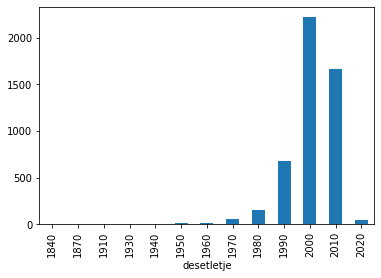

In [65]:
knjige_desetletje.groupby('desetletje').size().plot.bar()

Večina knjig z vrha seznama je bila napisana med letoma 2000 in 2020.

# Ali so knjige z literarnimi nagradami tudi med bralci bolje ocenjene?
Želim preveriti ali bralci knjigam z literarnimi nagradami v povprečju dajo višjo oceno, kot tistim brez nagrad. Želim tudi preveriti, ali povprečna ocena s številom nagrad narašča.

Za začetek poglejmo, ali je med knjigami več knjig z nagradami ali brez.

In [66]:
knjige.groupby('nagrade').size()

nagrade
False    2591
True     2409
dtype: int64

Slaba polovica knjig je torej prejela vsaj eno nagrado.

In [67]:
povprecna_ocena_z_nagrado = knjige[knjige.nagrade == True].povprecna_ocena.mean()

In [68]:
povprecna_ocena_z_nagrado

4.0491407222914075

In [69]:
povprecna_ocena_brez_nagrade = knjige[knjige.nagrade == False].povprecna_ocena.mean()

In [70]:
povprecna_ocena_brez_nagrade

4.075569278270938

Vidimo, da je ocena prvih knjig praktično ista za knjige z nagradami in knjige brez nagrad.

Sedaj si oglejmo ali se ocena nagrajenih knjig spreminja s stevilom nagrad

In [71]:
nagrajene_knjige = knjige[knjige.nagrade == True]

In [72]:
nagrajene_knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
6,The Book Thief,Markus Zusak,11466,False,It is 1939. Nazi Germany. The country is hol...,2006,Alfred A. Knopf,4.38,1407928,14526,1909675,115407,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,"Zero to One: Notes on Startups, or How to Buil...",Peter Thiel,8474721,False,"If you want to build a better future, you must...",2014,Crown Business,4.17,610,7,208564,6216,True
4986,An American Marriage,Tayari Jones,292970,False,"Newlyweds, Celestial and Roy, are the embodime...",2018,Algonquin Books,3.96,610,7,278310,23846,True
4988,The Last Guardian,Eoin Colfer,10896,True,It's Armageddon Time for Artemis Fowl Opal Ko...,2012,Disney/Hyperion Books,4.15,609,7,52204,2465,True


In [73]:
ocena_in_nagrade = pd.merge(nagrajene_knjige[['povprecna_ocena']],nagrade, left_on='id_knjige', right_on='id_knjige')

In [74]:
ocena_in_nagrade

,povprecna_ocena,nagrada
id_knjige,,
1,4.32,Locus Award Nominee for Best Young Adult Book
1,4.32,New Mexico Land of Enchantment Award for Young...
1,4.32,Eliot Rosewater Indiana High School Book Award
1,4.32,The Inky Awards for Silver Inky
1,4.32,California Young Readers Medal for Young Adult
...,...,...
4991,4.01,Locus Award Nominee for Best Science Fiction N...
4991,4.01,British Science Fiction Association Award Nomi...
4991,4.01,Hugo Award Nominee for Best Novel


In [75]:
knjige['st_nagrad']=ocena_in_nagrade.groupby('id_knjige').size().to_frame('st_nagrad')

In [76]:
ocena_z_nagradami = knjige.groupby('st_nagrad').povprecna_ocena.mean()

<AxesSubplot:xlabel='st_nagrad'>

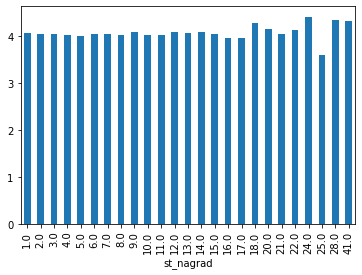

In [77]:
ocena_z_nagradami.plot.bar()

In [311]:
len(knjige[knjige.st_nagrad >= 18])

15

Ocena bralcev se pri zelo nagrajenih knjigah (okoli 20 nagrad) rahlo zviša, edina izjema so knjige s petindvajsetimi nagradami.
Vendar pa je knjig z več kot sedemnajstimi nagradami (tam ocena žačne naraščati) le 15, zato nimamo dovolj podatkov, da bi napovedali ali bo povprečna ocena zelo nagrajenih knjig tudi na splošno višja/nižja ali pa smo le dobili en dobro/slabo ocenjen primer. 

Število nagrad v splošnem ne vpliva na oceno bralcev.

# Ugotavljanje žanra

In [78]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if len(beseda)<=3:
        return ''
    elif beseda[-3:] in ["ing","ity","ily","ian"]:
        beseda=beseda[:-3]
    elif beseda[-2:] in ["ed","er","ly"]:
        beseda=beseda[:-2]
    return beseda.rstrip('sy')


In [79]:
def koreni_besed(niz):
    return pd.Series(sorted({koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split()}))

In [142]:
st_knjig_po_zanru = zanri.groupby('zanr').size()

In [143]:
st_knjig_po_zanru

zanr
19th-century              3
21st-century              2
abuse                     2
action                    6
adult                     9
                       ... 
world-war-ii             10
writing                   4
young-adult            1249
young-adult-fantasy       3
zombies                  16
Length: 241, dtype: int64

In [144]:
st_vseh_knjig = len(knjige)

In [145]:
verjetnost_zanra = (st_knjig_po_zanru / st_vseh_knjig)

In [146]:
verjetnost_zanra

zanr
19th-century           0.0006
21st-century           0.0004
abuse                  0.0004
action                 0.0012
adult                  0.0018
                        ...  
world-war-ii           0.0020
writing                0.0008
young-adult            0.2498
young-adult-fantasy    0.0006
zombies                0.0032
Length: 241, dtype: float64

In [147]:
opisi_in_zanri = pd.merge(knjige, zanri, left_on='id_knjige', right_on='id_knjige')[['zanr', 'opis']]

In [148]:
opisi_in_zanri

,zanr,opis
id_knjige,,
1,young-adult,"Could you survive on your own in the wild, wit..."
1,fiction,"Could you survive on your own in the wild, wit..."
1,dystopia,"Could you survive on your own in the wild, wit..."
2,fantasy,There is a door at the end of a silent corrido...
2,young-adult,There is a door at the end of a silent corrido...
...,...,...
4999,italian-literature,"Published by Rizzoli in 1975, Letter to a Chil..."
4999,novels,"Published by Rizzoli in 1975, Letter to a Chil..."
5000,epic,A journey to SELF. Layman's Handbook to life a...


In [149]:
Data = knjige
df = pd.DataFrame(Data)
df['opis'] = df['opis'].astype(str)

In [150]:
knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade,st_nagrad
id_knjige,,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True,41.0
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True,9.0
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True,4.0
4,Pride and Prejudice,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False,NaN
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Dragons of Winter Night,Margaret Weis,869,True,They won their first real battle in the war fo...,2007,Devil's Due Publishing,4.09,608,7,48760,811,False,NaN
4997,Tempt Me at Twilight,Lisa Kleypas,27847,True,He was everything she'd sworn to avoid. Poppy...,2009,St. Martin's Paperbacks,4.18,608,7,34971,1897,False,NaN
4998,هيبتا,محمد صادق,2994581,False,تأخذنا رواية (هيبتا) إلي ذلك العالم الذي أهلكه...,2014,الرواق للنشر والتوزيع,3.74,608,7,51945,6241,False,NaN


In [151]:
tabela_korenov_in_knjig = knjige.opis.apply(koreni_besed)

In [152]:
tabela_korenov_in_knjig

,0,1,2,3,4,5,6,7,8,9,...,520,521,522,523,524,525,526,527,528,529
id_knjige,,,,,,,,,,,,,,,,,,,,,
1,,against,age,alone,america,annual,become,been,beforeand,between,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,against,art,authoritie,boundle,corridor,dark,darkne,defense,depend,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,academ,alabama,also,alwa,american,appeal,award,became,behavior,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,appear,austen,beau,bennet,between,book,brilliant,call,character,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,about,absolute,bethat,bite,blood,deep,didnt,dominant,edward,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,,against,apart,band,battle,begun,born,companion,conflict,darkne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,,accept,anyth,arm,avoid,beguil,between,bod,compromise,dangerou,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,,أسامة,أهلكه,الأحداث,الأخطاء,الألم,التي,الجميع,الحب,الذي,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
koreni_in_knjige = tabela_korenov_in_knjig.stack().reset_index()[['id_knjige', 0]].rename(columns={ 0: 'koren'})

In [154]:
koreni_in_knjige

,id_knjige,koren
0,1,
1,1,against
2,1,age
3,1,alone
4,1,america
...,...,...
387652,5000,understand
387653,5000,unique
387654,5000,unusual
387655,5000,where


In [155]:
koreni_in_zanri = pd.merge(koreni_in_knjige, zanri,left_on='id_knjige', right_on='id_knjige')

In [156]:
koreni_in_zanri

,id_knjige,koren,zanr
0,1,,young-adult
1,1,,fiction
2,1,,dystopia
3,1,against,young-adult
4,1,against,fiction
...,...,...,...
1148517,5000,where,fiction
1148518,5000,where,novels
1148519,5000,with,epic
1148520,5000,with,fiction


Pri korenjenju besedila smo izpustili vse besede, krajše od štirih znakov in jih nadomestili s presledkom. V prvi vrstici naše tabele se sedaj nahajajo te neuporabni presledki, zato jih odstranimo.

In [178]:
stevila_korenov_pri_zanru.iloc[1:]

zanr,19th-century,21st-century,abuse,action,adult,adult-fiction,adventure,africa,african-american,aliens,...,war,werewolves,westerns,witches,world-war-i,world-war-ii,writing,young-adult,young-adult-fantasy,zombies
koren,,,,,,,,,,,,,,,,,,,,,
a,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
aanzien,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
aaron,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,3.1,0.1,0.1
ab,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,2.1,0.1,0.1
ababa,0.1,0.1,0.1,0.1,0.1,0.1,0.1,1.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ﻭﻳﺬﻫﺐ,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
ﻳﺄﺳﻬﺎ,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
ﻳﺘﺒﺨﺮ,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


Na žalost spletna stran ne vsebuje le angleških knjig(ali vsaj prevodov), zato koreni besed vsebujejo tudi kopico nizozemščine/arabščine. Zaradi tega je funkcija še manj natančna.

In [179]:
verjetnosti_korenov_pri_zanru = (stevila_korenov_pri_zanru+ 0.1) / st_knjig_po_zanru

In [316]:
koreni_primer= koreni_besed("Aliens")

In [317]:
(verjetnosti_korenov_pri_zanru[verjetnosti_korenov_pri_zanru.index.isin(koreni_primer)].prod() * verjetnost_zanra).sort_values().tail(5)[::-1]

zanr
fiction            0.00824
science-fiction    0.00744
fantasy            0.00304
young-adult        0.00244
paranormal         0.00164
dtype: float64

# Priporoči mi knjigo

Da pridobimo nekaj pisateljskega občutka, se odločimo prebrati knjige, ki ustrezajo tipu knjige, ki jo želimo napisati.

In [196]:
def priporoci_knjigo(zanr,serija,ocena):
    pravilni_zanri = zanri[zanri.zanr==zanr]
    ustrezna_serija = knjige[knjige.serija == serija]
    ustrezna_ocena = ustrezna_serija[knjige.povprecna_ocena >= ocena]
    return pd.merge(pravilni_zanri, ustrezna_ocena,left_on='id_knjige', right_on='id_knjige').head(10)

In [319]:
priporoci_knjigo("fiction",True,4).head(10)

<ipython-input-196-b7963f63a38a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ustrezna_ocena = ustrezna_serija[knjige.povprecna_ocena >= ocena]


,zanr,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade,st_nagrad
id_knjige,,,,,,,,,,,,,,,
1,fiction,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True,41.0
2,fiction,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True,9.0
3,fiction,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True,4.0
8,fiction,The Chronicles of Narnia,C.S. Lewis,1069006,True,"Journeys to the end of the world, fantastic cr...",2002,HarperCollins,4.26,1256688,13134,538495,10595,False,NaN
9,fiction,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,656983,True,"This four-volume, boxed set contains J.R.R. To...",2012,Ballantine Books,4.60,1185041,12366,113292,1832,False,NaN
12,fiction,The Hitchhiker's Guide to the Galaxy,Douglas Adams,4,True,Seconds before the Earth is demolished to make...,2007,Del Rey,4.22,1075365,11115,1490038,31357,False,NaN
19,fiction,Alice's Adventures in Wonderland / Through the...,Lewis Carroll,8164,True,"I can't explain myself, I'm afraid, sir, said ...",2000,Penguin Group (USA),4.06,845404,8932,473751,10992,False,NaN
22,fiction,Divergent,Veronica Roth,4039811,True,"In Beatrice Prior's dystopian Chicago world, s...",2012,Katherine Tegen Books,4.19,806084,8471,3020645,109171,True,20.0
30,fiction,Harry Potter and the Sorcerer's Stone,J.K. Rowling,1077326,True,Harry Potter's life is miserable. His parents ...,2003,Scholastic Inc,4.48,730630,7754,7370404,116815,True,28.0
